In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from matplotlib.lines import Line2D # for legend elements

Perceived mental illness is associated with other evaluations that are generally "exonerating" (e.g., lower control, more genetic causation), yet is associated with more wrongness... Look at the interaction between wrongness and control on mental illness (two lines for high and low wrongness, with control along the x-axis and mental illness along the y-axis)... Wondering whether control and mental illness are negatively associated for low wrongness and positively associated for high wrongness. This pattern might suggest a sort of motivated evaluation for mental illness. 

In [3]:
MI_all = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/condition.csv", index_col = False)

MI_all['wrong_med'] = MI_all.wrong > MI_all.wrong.median()
MI_all['wrong_med'] = np.where(MI_all.wrong_med == False, 'below median', 'above median')
MI_all

,Condition,mental,change,want_change,genes,punish,control,wrong,distress,common,wrong_med
0,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
1,pedo,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,8.0,below median
2,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
3,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
4,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
...,...,...,...,...,...,...,...,...,...,...,...
12225,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
12226,schizo,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,77.0,above median
12227,schizo,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,40.0,below median
12228,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median


In [4]:
wcM_model = smf.ols(formula = 'mental ~ control + wrong', data = MI_all).fit()
wcM_summary = wcM_model.summary()
print(wcM_summary.tables[0], wcM_summary.tables[1])

wcM_interaction = smf.ols(formula = 'mental ~ control + wrong + control:wrong', data = MI_all).fit()
summary = wcM_interaction.summary()
print(summary.tables[0], summary.tables[1])

                            OLS Regression Results                            
Dep. Variable:                 mental   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     533.4
Date:                Sun, 13 Aug 2023   Prob (F-statistic):          2.92e-210
Time:                        18:44:35   Log-Likelihood:                -10474.
No. Observations:                4888   AIC:                         2.095e+04
Df Residuals:                    4885   BIC:                         2.097e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================== ==============================================================================
                 coef    std err          t      P>|

/Users/merieldoyle/opt/anaconda3/envs/ckMIconda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/q7/0p1jf63j7lx6ldgn2kdfqlz00000gn/T/ipykernel_1689/379368069.py:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in wcM._legend.legendHandles:


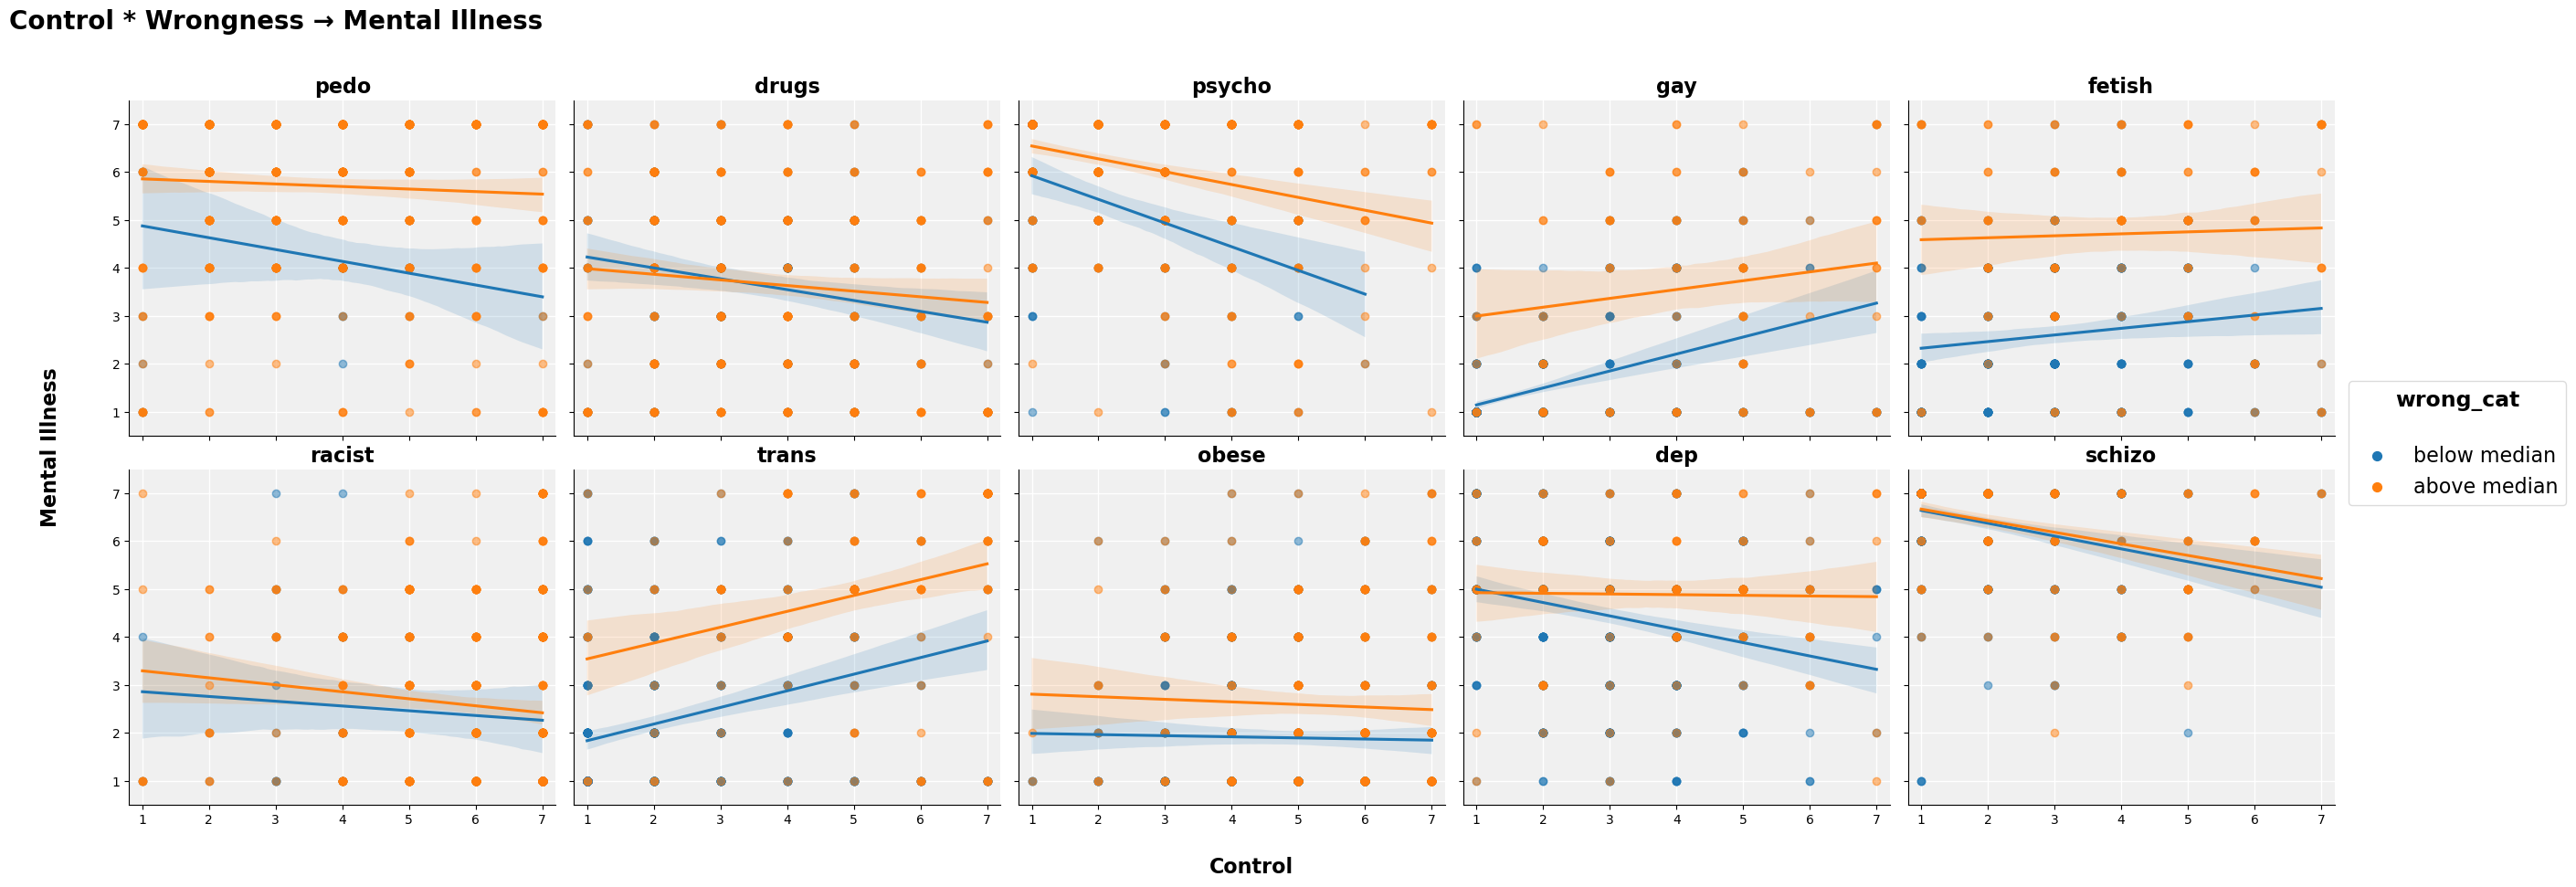

In [7]:
custom_titles = ['pedo', 'drugs', 'psycho', 'gay', 'fetish',
                 'racist', 'trans', 'obese', 'dep', 'schizo']

wcM = sns.lmplot(
    data = MI_all, 
    x = 'control', y = 'mental', 
    col = 'Condition', hue = 'wrong_med', col_wrap = 5,
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.5})

wcM.set(ylim = (0.5, 7.5), xlim = (0.8, 7.2), ylabel = "", xlabel = "")

wcM.add_legend(legend_data = wcM._legend_data, 
              title = 'wrong_cat\n', # \n adds a space between title and elements
              prop = {'size': 16}, 
              edgecolor = 'lightgray',
              frameon = True, fancybox = True) # legend title

wcM._legend.get_title().set_weight('bold') # bold title
wcM._legend.get_title().set_size('17') # bold title

for lh in wcM._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 
    
for ax, title in zip(wcM.axes.flat, custom_titles):
    ax.set_title(title, fontsize = 16, fontweight = "bold")

wcM.fig.suptitle('Control * Wrongness → Mental Illness', x = 0.08, y = 0.93, size = 20, fontweight = "bold")
wcM.fig.subplots_adjust(top = .83, hspace = 0.1)

wcM.fig.text(0.47, -0.01, 'Control', ha='center', va='center', fontsize=16, fontweight='bold') # common x-label
wcM.fig.text(-0.01, 0.45, 'Mental Illness', ha='center', va='center', fontsize=16, fontweight='bold', rotation='vertical') # common y-label

for ax in wcM.axes.flat:
    ax.set_facecolor('#F0F0F0')  # set background color
    ax.yaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint horizontal gridlines
    ax.xaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint vertical gridlines
    ax.set_axisbelow(True)  # put gridlines below bar plots

plt.show(wcM)

In [8]:
above_median_count = MI_all[MI_all['wrong_med'] == 'above median'].groupby('Condition')['wrong_med'].count()
above_median_count = above_median_count.sort_values(ascending=False)

top_5_conditions = above_median_count.head(5).index
bottom_5_conditions = above_median_count.tail(5).index

mean_df = MI_all.groupby('Condition')[['mental', 'wrong', 'control']].mean().reset_index()

mean_df

,Condition,mental,wrong,control
0,dep,4.563410,2.831601,3.093555
1,drugs,3.674274,4.852697,3.601660
2,fetish,3.250696,3.462396,3.401114
3,gay,1.859213,2.356108,2.360248
4,obese,2.165884,3.809077,5.021909
5,pedo,5.618257,6.603734,3.732365
6,psycho,5.877847,5.565217,2.635611
7,racist,2.578189,6.236626,5.718107
8,schizo,6.363825,3.343035,2.122661
9,trans,2.951172,2.894531,3.039062


In [9]:
mean_df['wrong_med'] = mean_df['Condition'].apply(lambda x: 'above median' if x in top_5_conditions else 'below median')

mean_df

,Condition,mental,wrong,control,wrong_med
0,dep,4.563410,2.831601,3.093555,below median
1,drugs,3.674274,4.852697,3.601660,above median
2,fetish,3.250696,3.462396,3.401114,below median
3,gay,1.859213,2.356108,2.360248,below median
4,obese,2.165884,3.809077,5.021909,above median
5,pedo,5.618257,6.603734,3.732365,above median
6,psycho,5.877847,5.565217,2.635611,above median
7,racist,2.578189,6.236626,5.718107,above median
8,schizo,6.363825,3.343035,2.122661,below median
9,trans,2.951172,2.894531,3.039062,below median


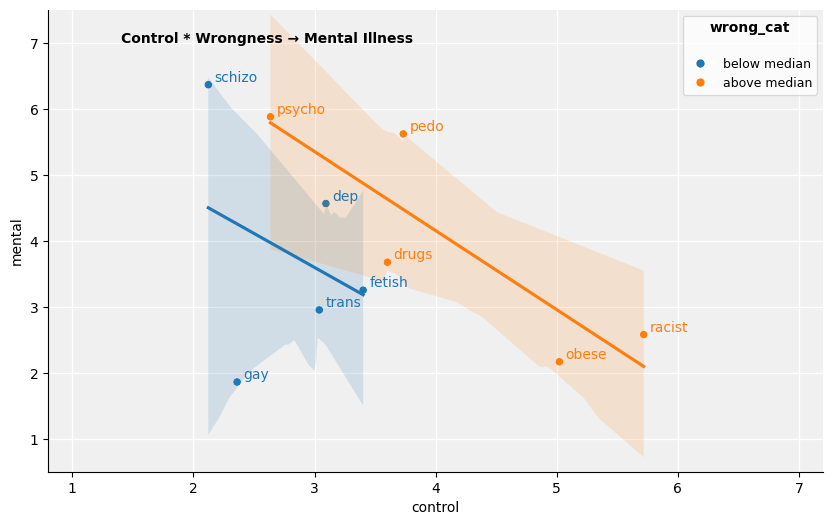

In [11]:
color_dict = {'below median': '#1f77b4', 'above median': '#ff7f0e'}

legend_elements = [Line2D([0], [0], marker='o', color='w', label='below median',
                          markerfacecolor='#1f77b4', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='above median',
                          markerfacecolor='#ff7f0e', markersize=7)]

plt.figure(figsize=(10, 6))

mcW_all = sns.scatterplot(
    data=mean_df,
    x='control',
    y='mental',
    hue='wrong_med',
    alpha=1
)

mcW_all.axes.set_facecolor('#F0F0F0')
mcW_all.axes.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')
mcW_all.axes.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')
mcW_all.axes.set_axisbelow(True)

mcW_all.spines['top'].set_visible(False)
mcW_all.spines['right'].set_visible(False)

hue_categories = mean_df['wrong_med'].unique()

for hue_category in hue_categories:
    data_subset = mean_df[mean_df['wrong_med'] == hue_category]
    sns.regplot(
        data=data_subset,
        x='control',
        y='mental',
        scatter=False
    )
    
for index, row in mean_df.iterrows():
    plt.text(
        row['control'] + 0.05,
        row['mental'] + 0.05,
        row['Condition'],
        color=color_dict[row['wrong_med']],
        fontsize=10,
    )

plt.xlim(0.8, 7.2)
plt.ylim(0.5, 7.5)

plt.text(1.4, 7, 'Control * Wrongness → Mental Illness', fontsize=10, fontweight = "bold")

legend = plt.legend(handles=legend_elements, 
                    title='wrong_cat\n', title_fontsize=10, 
                    edgecolor='lightgray', prop = {'size': 9}, 
                    fancybox=True)

legend.get_title().set_weight('bold')

# save_directory = "/Users/merieldoyle/Desktop/ckMI/results/figures/moderations/"
# file_name = "mental-wrong-punish-ALL.png"
# save_path = save_directory + file_name

# plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()